# Principal Component Analysis (PCA) Demonstration

This notebook demonstrates the fundamentals of Principal Component Analysis (PCA), a dimensionality reduction technique commonly used in machine learning and data analysis.

## Learning Objectives
- Understand what PCA is and why it's useful
- Learn how PCA works mathematically
- Apply PCA to real datasets
- Visualize the results of dimensionality reduction
- Understand how to choose the number of components

## 1. Import Required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris, load_wine, make_blobs
from mpl_toolkits.mplot3d import Axes3D

# Set style for better plots
plt.style.use('default')
sns.set_palette("husl")

print("Libraries imported successfully!")

Libraries imported successfully!


## 2. What is PCA?

**Principal Component Analysis (PCA)** is a statistical technique used for:
- **Dimensionality reduction**: Reducing the number of features while preserving most of the information
- **Data visualization**: Projecting high-dimensional data to 2D or 3D for visualization
- **Noise reduction**: Removing less important variations in the data
- **Feature extraction**: Creating new features that capture the most variance in the data

### Key Concepts:
- **Principal Components**: New orthogonal axes that capture maximum variance
- **Explained Variance**: How much of the original data's variance each component explains
- **Loadings**: How much each original feature contributes to each principal component

## 3. Simple 2D Example: Understanding PCA Geometrically

In [2]:
# Generate synthetic 2D data with correlation
np.random.seed(42)
n_samples = 300

# Create correlated data
x1 = np.random.normal(0, 1, n_samples)
x2 = x1 + np.random.normal(0, 0.5, n_samples)  # x2 is correlated with x1

# Combine into dataset
data_2d = np.column_stack([x1, x2])

print(f"Original data shape: {data_2d.shape}")
print(f"Data correlation coefficient: {np.corrcoef(x1, x2)[0,1]:.3f}")

Original data shape: (300, 2)
Data correlation coefficient: 0.895


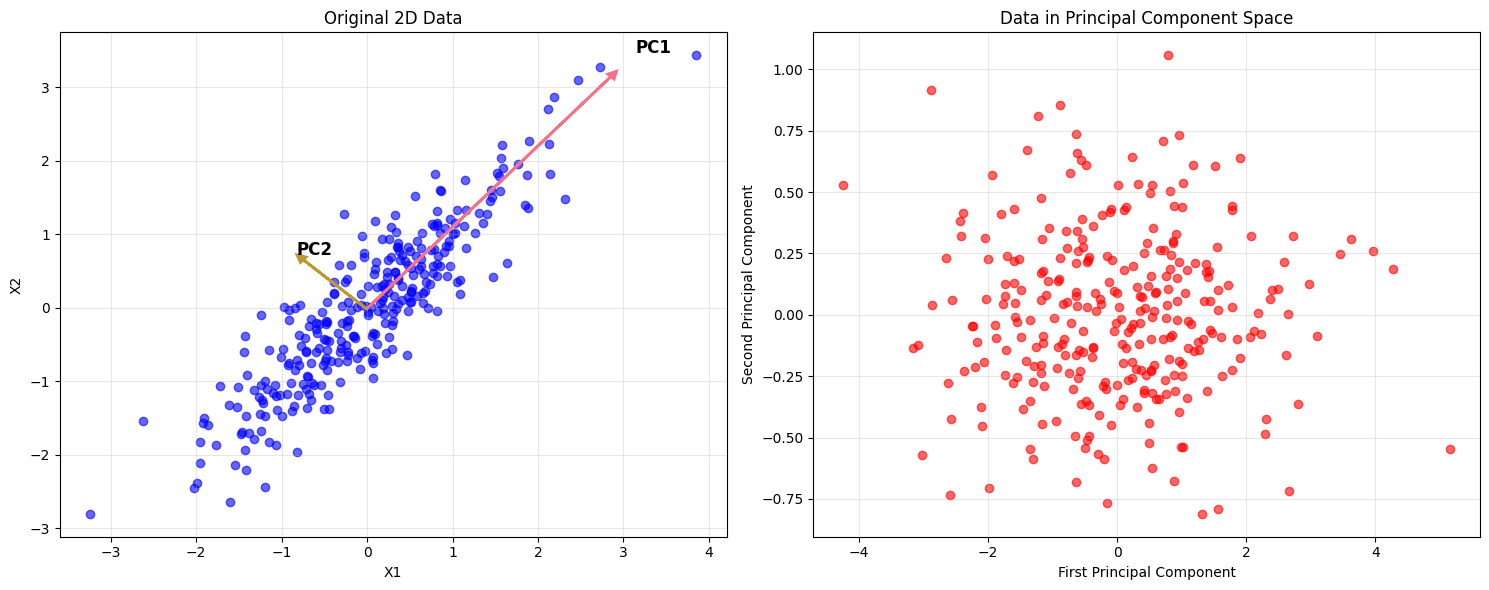

Explained variance ratio: [0.94802857 0.05197143]
First PC explains 94.8% of variance
Second PC explains 5.2% of variance


In [3]:
# Apply PCA to 2D data
pca_2d = PCA(n_components=2)
data_2d_pca = pca_2d.fit_transform(data_2d)

# Plot original data and principal components
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(7, 3))

# Original data
ax1.scatter(data_2d[:, 0], data_2d[:, 1], alpha=0.6, color='blue')
ax1.set_xlabel('X1')
ax1.set_ylabel('X2')
ax1.set_title('Original 2D Data')
ax1.grid(True, alpha=0.3)

# Add principal component vectors
mean_x, mean_y = np.mean(data_2d, axis=0)
for i in range(2):
    # Principal component vectors (scaled for visualization)
    pc_vector = pca_2d.components_[i] * np.sqrt(pca_2d.explained_variance_[i]) * 3
    ax1.arrow(mean_x, mean_y, pc_vector[0], pc_vector[1], 
              head_width=0.1, head_length=0.1, fc=f'C{i}', ec=f'C{i}', linewidth=2)
    ax1.text(mean_x + pc_vector[0]*1.1, mean_y + pc_vector[1]*1.1, 
             f'PC{i+1}', fontsize=12, fontweight='bold')

# Transformed data (in PC space)
ax2.scatter(data_2d_pca[:, 0], data_2d_pca[:, 1], alpha=0.6, color='red')
ax2.set_xlabel('First Principal Component')
ax2.set_ylabel('Second Principal Component')
ax2.set_title('Data in Principal Component Space')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Print explained variance
print(f"Explained variance ratio: {pca_2d.explained_variance_ratio_}")
print(f"First PC explains {pca_2d.explained_variance_ratio_[0]:.1%} of variance")
print(f"Second PC explains {pca_2d.explained_variance_ratio_[1]:.1%} of variance")

## 4. Real Dataset Example: Iris Dataset

Let's apply PCA to the famous Iris dataset to see how it works with real data.

In [4]:
# Load Iris dataset
iris = load_iris()
X_iris = iris.data
y_iris = iris.target
feature_names = iris.feature_names
target_names = iris.target_names

print(f"Iris dataset shape: {X_iris.shape}")
print(f"Features: {feature_names}")
print(f"Target classes: {target_names}")

# Create DataFrame for easier handling
iris_df = pd.DataFrame(X_iris, columns=feature_names)
iris_df['species'] = [target_names[i] for i in y_iris]

print("\nFirst few rows:")
print(iris_df.head())

Iris dataset shape: (150, 4)
Features: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target classes: ['setosa' 'versicolor' 'virginica']

First few rows:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  species  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa  


In [5]:
# Standardize the features (important for PCA!)
scaler = StandardScaler()
X_iris_scaled = scaler.fit_transform(X_iris)

print("Why standardization is important:")
print(f"Original feature means: {X_iris.mean(axis=0)}")
print(f"Original feature std: {X_iris.std(axis=0)}")
print(f"Scaled feature means: {X_iris_scaled.mean(axis=0)}")
print(f"Scaled feature std: {X_iris_scaled.std(axis=0)}")

Why standardization is important:
Original feature means: [5.84333333 3.05733333 3.758      1.19933333]
Original feature std: [0.82530129 0.43441097 1.75940407 0.75969263]
Scaled feature means: [-1.69031455e-15 -1.84297022e-15 -1.69864123e-15 -1.40924309e-15]
Scaled feature std: [1. 1. 1. 1.]


In [6]:
# Apply PCA to Iris dataset
pca_iris = PCA(n_components=4)  # Keep all components initially
X_iris_pca = pca_iris.fit_transform(X_iris_scaled)

# Create DataFrame with PCA results
pca_df = pd.DataFrame(X_iris_pca, columns=[f'PC{i+1}' for i in range(4)])
pca_df['species'] = [target_names[i] for i in y_iris]

print("PCA Results:")
print(f"Explained variance ratio: {pca_iris.explained_variance_ratio_}")
print(f"Cumulative explained variance: {pca_iris.explained_variance_ratio_.cumsum()}")
print(f"\nFirst 2 PCs explain {pca_iris.explained_variance_ratio_[:2].sum():.1%} of variance")

PCA Results:
Explained variance ratio: [0.72962445 0.22850762 0.03668922 0.00517871]
Cumulative explained variance: [0.72962445 0.95813207 0.99482129 1.        ]

First 2 PCs explain 95.8% of variance


C:\Users\106360\AppData\Local\Temp\ipykernel_23792\3331691051.py:8: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro-" (-> color='r'). The keyword argument will take precedence.
  ax1.plot(components, pca_iris.explained_variance_ratio_.cumsum(),


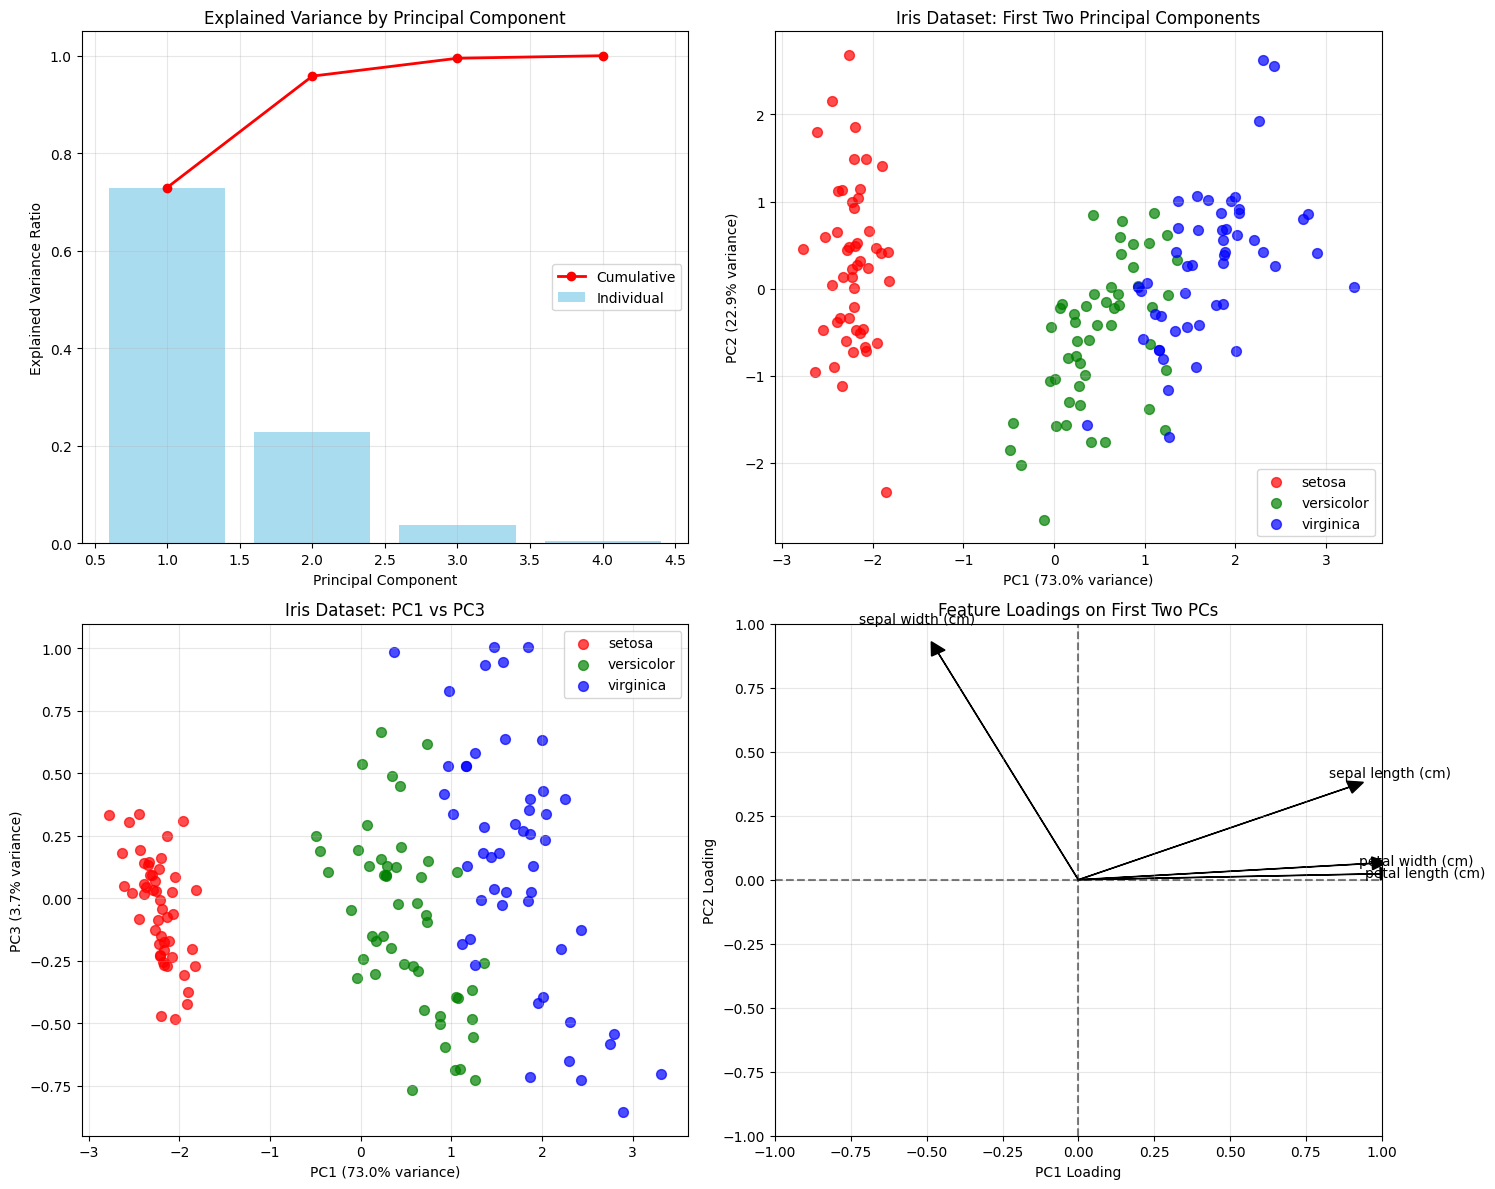

In [7]:
# Visualize PCA results
fig, axes = plt.subplots(2, 2, figsize=(7, 6))

# 1. Explained Variance
ax1 = axes[0, 0]
components = range(1, 5)
ax1.bar(components, pca_iris.explained_variance_ratio_, alpha=0.7, color='skyblue')
ax1.plot(components, pca_iris.explained_variance_ratio_.cumsum(), 
         'ro-', color='red', linewidth=2, markersize=6)
ax1.set_xlabel('Principal Component')
ax1.set_ylabel('Explained Variance Ratio')
ax1.set_title('Explained Variance by Principal Component')
ax1.grid(True, alpha=0.3)
ax1.legend(['Cumulative', 'Individual'], loc='center right')

# 2. PC1 vs PC2 scatter plot
ax2 = axes[0, 1]
colors = ['red', 'green', 'blue']
for i, species in enumerate(target_names):
    mask = pca_df['species'] == species
    ax2.scatter(pca_df.loc[mask, 'PC1'], pca_df.loc[mask, 'PC2'], 
                c=colors[i], label=species, alpha=0.7, s=50)
ax2.set_xlabel(f'PC1 ({pca_iris.explained_variance_ratio_[0]:.1%} variance)')
ax2.set_ylabel(f'PC2 ({pca_iris.explained_variance_ratio_[1]:.1%} variance)')
ax2.set_title('Iris Dataset: First Two Principal Components')
ax2.legend()
ax2.grid(True, alpha=0.3)

# 3. PC1 vs PC3 scatter plot
ax3 = axes[1, 0]
for i, species in enumerate(target_names):
    mask = pca_df['species'] == species
    ax3.scatter(pca_df.loc[mask, 'PC1'], pca_df.loc[mask, 'PC3'], 
                c=colors[i], label=species, alpha=0.7, s=50)
ax3.set_xlabel(f'PC1 ({pca_iris.explained_variance_ratio_[0]:.1%} variance)')
ax3.set_ylabel(f'PC3 ({pca_iris.explained_variance_ratio_[2]:.1%} variance)')
ax3.set_title('Iris Dataset: PC1 vs PC3')
ax3.legend()
ax3.grid(True, alpha=0.3)

# 4. Feature loadings (how original features contribute to PCs)
ax4 = axes[1, 1]
loadings = pca_iris.components_.T * np.sqrt(pca_iris.explained_variance_)
for i, feature in enumerate(feature_names):
    ax4.arrow(0, 0, loadings[i, 0], loadings[i, 1], 
              head_width=0.05, head_length=0.05, fc='black', ec='black')
    ax4.text(loadings[i, 0]*1.15, loadings[i, 1]*1.15, feature, 
             fontsize=10, ha='center', va='center')
ax4.set_xlim(-1, 1)
ax4.set_ylim(-1, 1)
ax4.set_xlabel('PC1 Loading')
ax4.set_ylabel('PC2 Loading')
ax4.set_title('Feature Loadings on First Two PCs')
ax4.grid(True, alpha=0.3)
ax4.axhline(y=0, color='k', linestyle='--', alpha=0.5)
ax4.axvline(x=0, color='k', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

## 5. PCA Components Analysis

Let's examine what each principal component represents in terms of the original features.

In [8]:
# Detailed analysis of principal components
components_df = pd.DataFrame(
    pca_iris.components_.T,
    columns=[f'PC{i+1}' for i in range(4)],
    index=feature_names
)

print("Principal Components (Loadings):")
print(components_df.round(3))

# Interpretation
print("\nInterpretation:")
print("PC1: Overall size/scale of the flower (all features have similar positive loadings)")
print("PC2: Sepal vs Petal contrast (sepal features vs petal features)")
print("PC3: Length vs Width contrast (length features vs width features)")
print("PC4: Specific shape variations (mixed loadings)")

Principal Components (Loadings):
                     PC1    PC2    PC3    PC4
sepal length (cm)  0.521  0.377 -0.720 -0.261
sepal width (cm)  -0.269  0.923  0.244  0.124
petal length (cm)  0.580  0.024  0.142  0.801
petal width (cm)   0.565  0.067  0.634 -0.524

Interpretation:
PC1: Overall size/scale of the flower (all features have similar positive loadings)
PC2: Sepal vs Petal contrast (sepal features vs petal features)
PC3: Length vs Width contrast (length features vs width features)
PC4: Specific shape variations (mixed loadings)


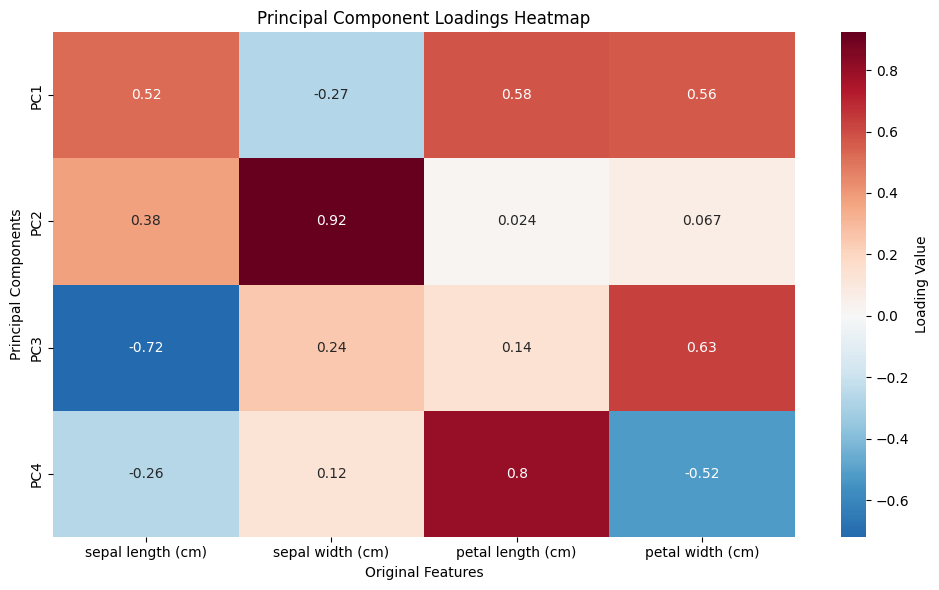


Variance Explanation:
  Component  Explained Variance Ratio  Cumulative Variance
0       PC1                    0.7296               0.7296
1       PC2                    0.2285               0.9581
2       PC3                    0.0367               0.9948
3       PC4                    0.0052               1.0000


In [9]:
# Visualize component loadings as heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(components_df.T, annot=True, cmap='RdBu_r', center=0, 
            cbar_kws={'label': 'Loading Value'})
plt.title('Principal Component Loadings Heatmap')
plt.xlabel('Original Features')
plt.ylabel('Principal Components')
plt.tight_layout()
plt.show()

# Show explained variance for each component
variance_df = pd.DataFrame({
    'Component': [f'PC{i+1}' for i in range(4)],
    'Explained Variance Ratio': pca_iris.explained_variance_ratio_,
    'Cumulative Variance': pca_iris.explained_variance_ratio_.cumsum()
})

print("\nVariance Explanation:")
print(variance_df.round(4))

## 6. Choosing the Number of Components

A key decision in PCA is how many components to keep. Let's explore different methods.

Components needed for 90% variance: 2
Components needed for 95% variance: 2
Components with eigenvalue > 1: 1


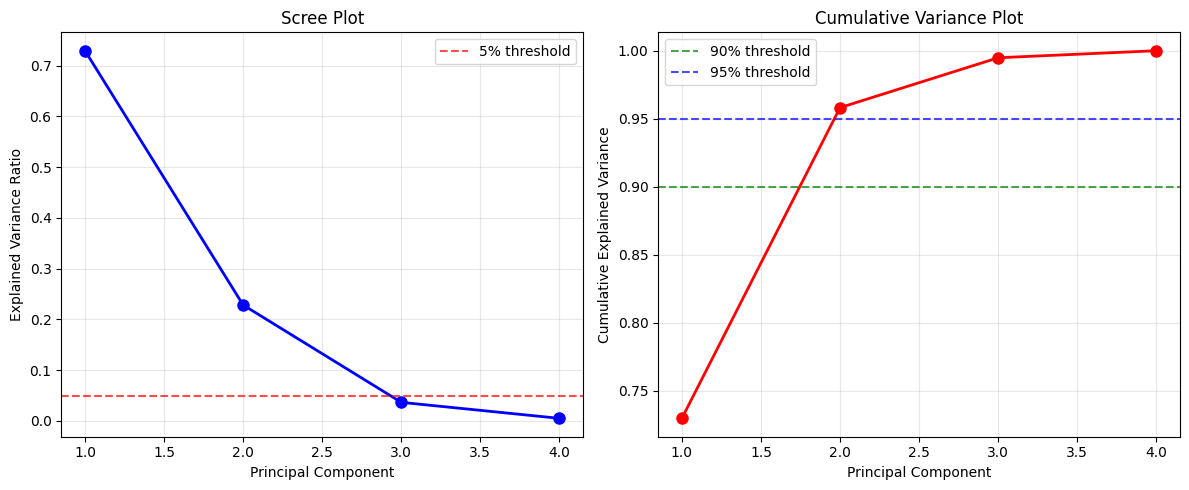

In [10]:
# Method 1: Cumulative explained variance threshold
cumvar = pca_iris.explained_variance_ratio_.cumsum()
n_components_90 = np.argmax(cumvar >= 0.9) + 1
n_components_95 = np.argmax(cumvar >= 0.95) + 1

print(f"Components needed for 90% variance: {n_components_90}")
print(f"Components needed for 95% variance: {n_components_95}")

# Method 2: Kaiser criterion (eigenvalue > 1)
eigenvalues = pca_iris.explained_variance_
n_components_kaiser = np.sum(eigenvalues > 1)
print(f"Components with eigenvalue > 1: {n_components_kaiser}")

# Method 3: Scree plot (elbow method)
plt.figure(figsize=(6, 3))

plt.subplot(1, 2, 1)
plt.plot(range(1, 5), pca_iris.explained_variance_ratio_, 'bo-', linewidth=2, markersize=8)
plt.axhline(y=0.05, color='r', linestyle='--', alpha=0.7, label='5% threshold')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot')
plt.grid(True, alpha=0.3)
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(range(1, 5), cumvar, 'ro-', linewidth=2, markersize=8)
plt.axhline(y=0.9, color='g', linestyle='--', alpha=0.7, label='90% threshold')
plt.axhline(y=0.95, color='b', linestyle='--', alpha=0.7, label='95% threshold')
plt.xlabel('Principal Component')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Variance Plot')
plt.grid(True, alpha=0.3)
plt.legend()

plt.tight_layout()
plt.show()

## 7. PCA for Data Compression and Reconstruction

Let's see how PCA can be used to compress data and reconstruct it with reduced dimensions.

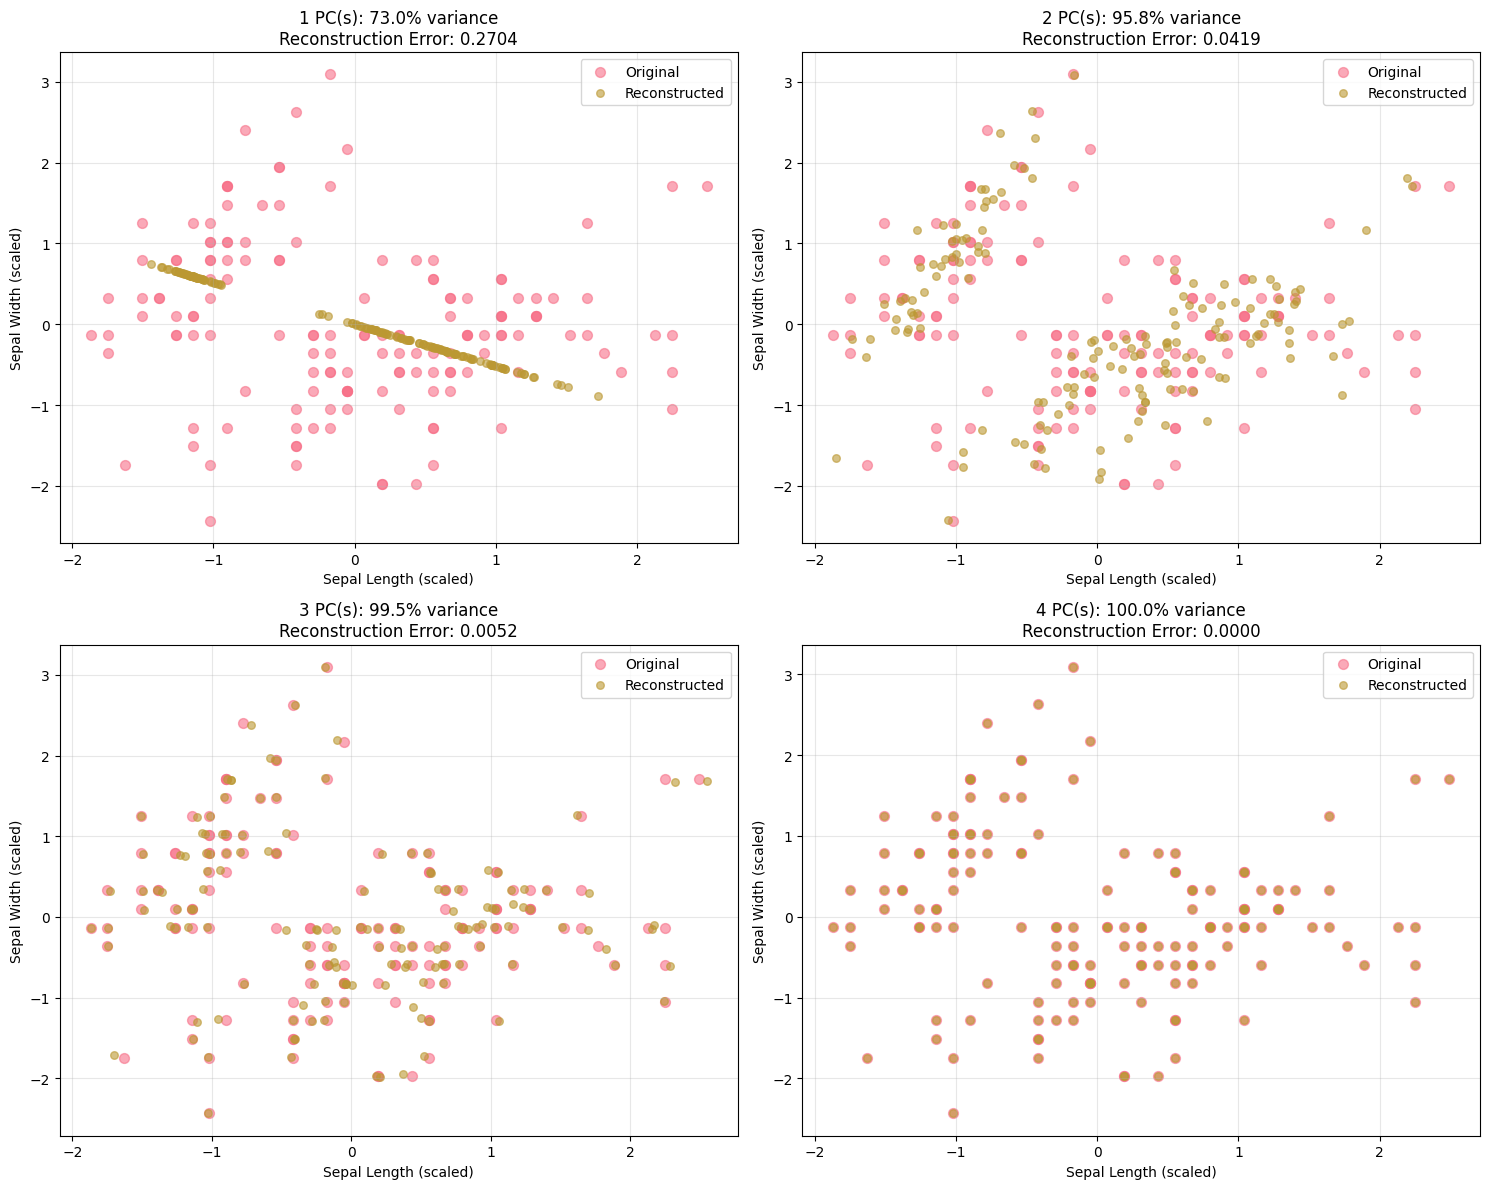


Reconstruction Quality vs Number of Components:
   Components  Explained Variance  Reconstruction Error
0           1              0.7296                0.2704
1           2              0.9581                0.0419
2           3              0.9948                0.0052
3           4              1.0000                0.0000


In [11]:
# Apply PCA with different numbers of components
n_components_list = [1, 2, 3, 4]
reconstruction_errors = []

fig, axes = plt.subplots(2, 2, figsize=(7, 6))
axes = axes.ravel()

for i, n_comp in enumerate(n_components_list):
    # Fit PCA with n_comp components
    pca_temp = PCA(n_components=n_comp)
    X_transformed = pca_temp.fit_transform(X_iris_scaled)
    X_reconstructed = pca_temp.inverse_transform(X_transformed)
    
    # Calculate reconstruction error
    reconstruction_error = np.mean((X_iris_scaled - X_reconstructed) ** 2)
    reconstruction_errors.append(reconstruction_error)
    
    # Plot original vs reconstructed for first two features
    ax = axes[i]
    ax.scatter(X_iris_scaled[:, 0], X_iris_scaled[:, 1], 
               alpha=0.6, label='Original', s=50)
    ax.scatter(X_reconstructed[:, 0], X_reconstructed[:, 1], 
               alpha=0.6, label='Reconstructed', s=30)
    
    ax.set_xlabel('Sepal Length (scaled)')
    ax.set_ylabel('Sepal Width (scaled)')
    ax.set_title(f'{n_comp} PC(s): {pca_temp.explained_variance_ratio_.sum():.1%} variance\n'
                f'Reconstruction Error: {reconstruction_error:.4f}')
    ax.legend()
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Show reconstruction errors
error_df = pd.DataFrame({
    'Components': n_components_list,
    'Explained Variance': [PCA(n_components=n).fit(X_iris_scaled).explained_variance_ratio_.sum() 
                          for n in n_components_list],
    'Reconstruction Error': reconstruction_errors
})

print("\nReconstruction Quality vs Number of Components:")
print(error_df.round(4))

## 8. 3D Visualization Example

Let's create a 3D visualization to better understand how PCA works in higher dimensions.

In [12]:
# Create 3D visualization using Wine dataset (more features)
wine = load_wine()
X_wine = wine.data
y_wine = wine.target
wine_feature_names = wine.feature_names
wine_target_names = wine.target_names

print(f"Wine dataset shape: {X_wine.shape}")
print(f"Number of features: {len(wine_feature_names)}")
print(f"Target classes: {wine_target_names}")

# Standardize and apply PCA
X_wine_scaled = StandardScaler().fit_transform(X_wine)
pca_wine = PCA(n_components=3)
X_wine_pca = pca_wine.fit_transform(X_wine_scaled)

print(f"\nFirst 3 PCs explain {pca_wine.explained_variance_ratio_.sum():.1%} of variance")
print(f"Individual explained variance: {pca_wine.explained_variance_ratio_}")

Wine dataset shape: (178, 13)
Number of features: 13
Target classes: ['class_0' 'class_1' 'class_2']

First 3 PCs explain 66.5% of variance
Individual explained variance: [0.36198848 0.1920749  0.11123631]


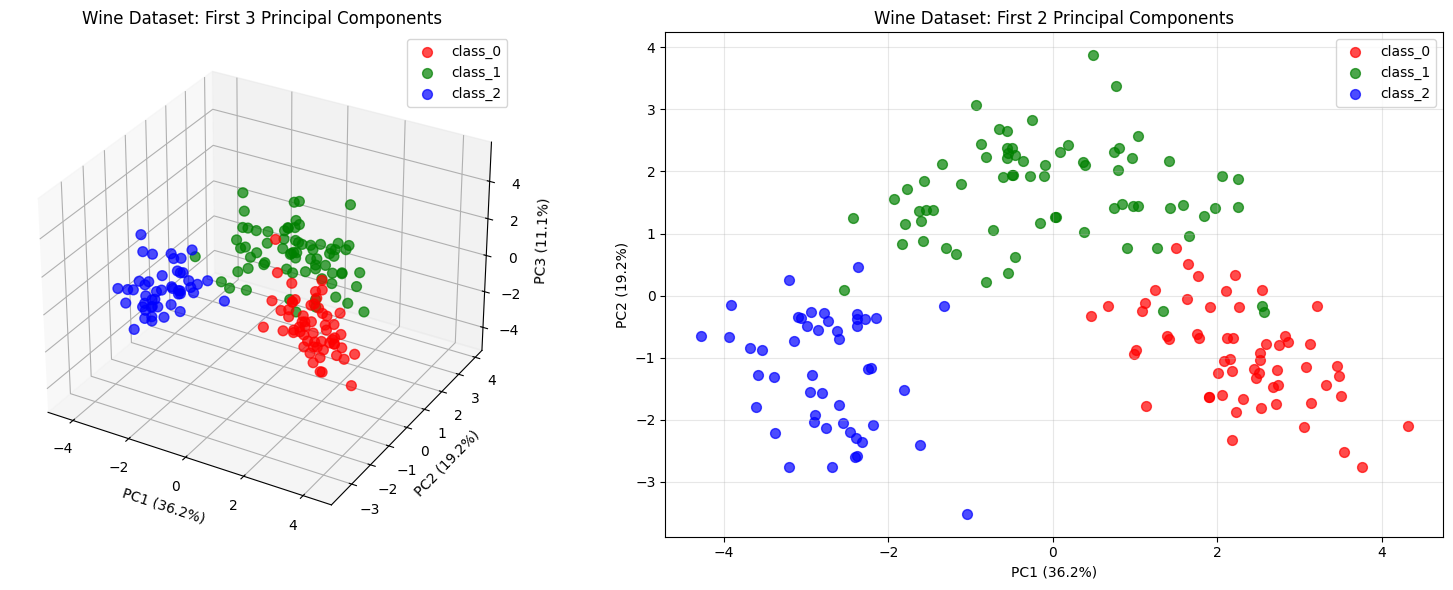

In [13]:
# Create 3D scatter plot
fig = plt.figure(figsize=(16, 6))

# 3D plot
ax1 = fig.add_subplot(121, projection='3d')
colors = ['red', 'green', 'blue']
for i, wine_class in enumerate(wine_target_names):
    mask = y_wine == i
    ax1.scatter(X_wine_pca[mask, 0], X_wine_pca[mask, 1], X_wine_pca[mask, 2],
                c=colors[i], label=wine_class, alpha=0.7, s=50)

ax1.set_xlabel(f'PC1 ({pca_wine.explained_variance_ratio_[0]:.1%})')
ax1.set_ylabel(f'PC2 ({pca_wine.explained_variance_ratio_[1]:.1%})')
ax1.set_zlabel(f'PC3 ({pca_wine.explained_variance_ratio_[2]:.1%})')
ax1.set_title('Wine Dataset: First 3 Principal Components')
ax1.legend()

# 2D projection
ax2 = fig.add_subplot(122)
for i, wine_class in enumerate(wine_target_names):
    mask = y_wine == i
    ax2.scatter(X_wine_pca[mask, 0], X_wine_pca[mask, 1],
                c=colors[i], label=wine_class, alpha=0.7, s=50)

ax2.set_xlabel(f'PC1 ({pca_wine.explained_variance_ratio_[0]:.1%})')
ax2.set_ylabel(f'PC2 ({pca_wine.explained_variance_ratio_[1]:.1%})')
ax2.set_title('Wine Dataset: First 2 Principal Components')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 9. Practical Tips and Best Practices

Let's summarize key points and best practices for using PCA effectively.

=== Importance of Feature Scaling ===


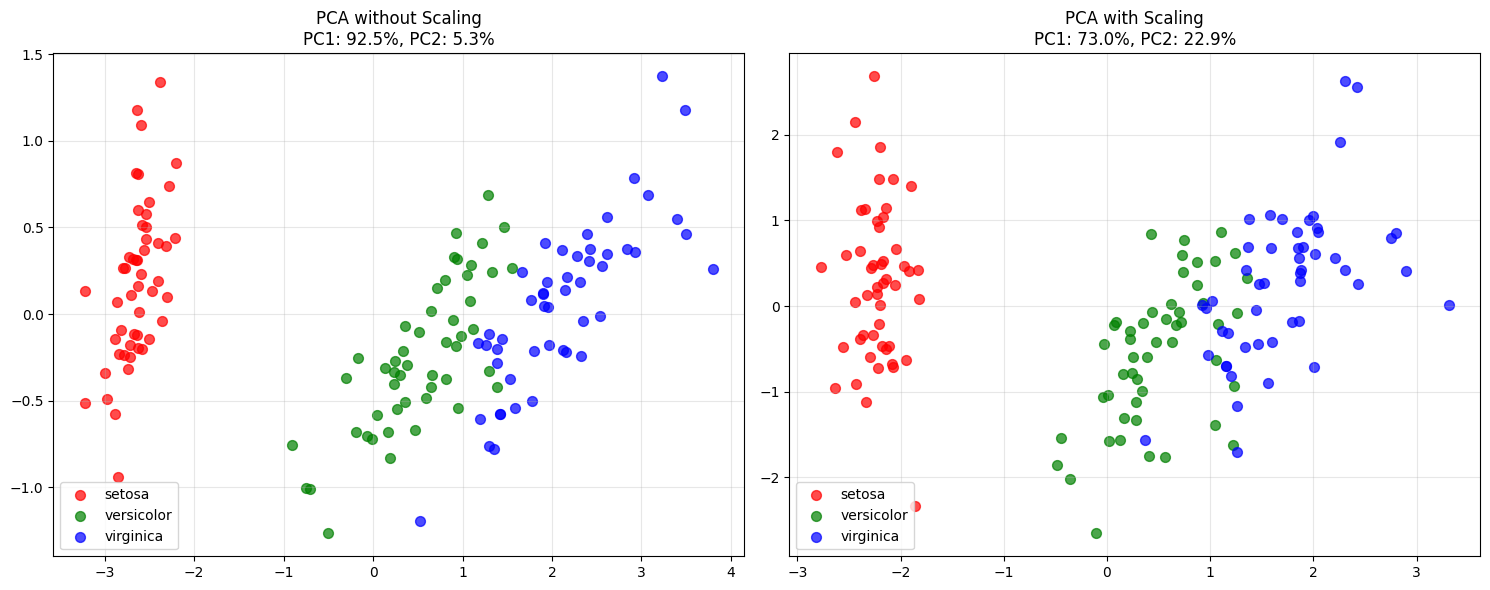

Without scaling - explained variance: [0.92461872 0.05306648]
With scaling - explained variance: [0.72962445 0.22850762]

Difference in first PC: 0.195


In [14]:
# Demonstrate the importance of scaling
print("=== Importance of Feature Scaling ===")

# PCA without scaling
pca_unscaled = PCA(n_components=2)
X_iris_pca_unscaled = pca_unscaled.fit_transform(X_iris)

# PCA with scaling
pca_scaled = PCA(n_components=2)
X_iris_pca_scaled = pca_scaled.fit_transform(X_iris_scaled)

# Compare results
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(7, 3))

# Without scaling
for i, species in enumerate(target_names):
    mask = y_iris == i
    ax1.scatter(X_iris_pca_unscaled[mask, 0], X_iris_pca_unscaled[mask, 1], 
                c=colors[i], label=species, alpha=0.7, s=50)
ax1.set_title(f'PCA without Scaling\nPC1: {pca_unscaled.explained_variance_ratio_[0]:.1%}, '
              f'PC2: {pca_unscaled.explained_variance_ratio_[1]:.1%}')
ax1.legend()
ax1.grid(True, alpha=0.3)

# With scaling
for i, species in enumerate(target_names):
    mask = y_iris == i
    ax2.scatter(X_iris_pca_scaled[mask, 0], X_iris_pca_scaled[mask, 1], 
                c=colors[i], label=species, alpha=0.7, s=50)
ax2.set_title(f'PCA with Scaling\nPC1: {pca_scaled.explained_variance_ratio_[0]:.1%}, '
              f'PC2: {pca_scaled.explained_variance_ratio_[1]:.1%}')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"Without scaling - explained variance: {pca_unscaled.explained_variance_ratio_}")
print(f"With scaling - explained variance: {pca_scaled.explained_variance_ratio_}")
print(f"\nDifference in first PC: {abs(pca_unscaled.explained_variance_ratio_[0] - pca_scaled.explained_variance_ratio_[0]):.3f}")

## 10. Summary and Key Takeaways

### What we learned:

1. **PCA Purpose**: Dimensionality reduction while preserving maximum variance
2. **Preprocessing**: Always standardize features before applying PCA
3. **Component Selection**: Use explained variance, scree plots, or domain knowledge
4. **Interpretation**: Principal components are linear combinations of original features
5. **Applications**: Data visualization, noise reduction, feature extraction

### Best Practices:
- ✅ Standardize features (mean=0, std=1)
- ✅ Check explained variance ratios
- ✅ Use scree plots to choose components
- ✅ Interpret component loadings
- ✅ Consider domain knowledge
- ❌ Don't apply PCA to categorical variables directly
- ❌ Don't ignore the interpretability trade-off

### When to use PCA:
- High-dimensional data visualization
- Preprocessing for other ML algorithms
- Data compression
- Noise reduction
- Feature extraction

Testing PCA Pipeline with Iris Dataset:
PCA Analysis Summary:
Original dimensions: (150, 4)
Reduced dimensions: (150, 2)
Compression ratio: 0.50
Total variance explained: 95.8%


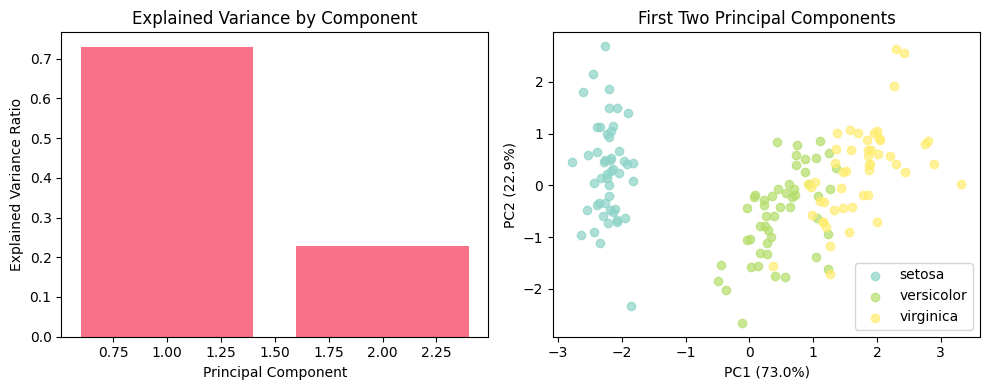

In [15]:
# Final demonstration: PCA pipeline function
def pca_analysis_pipeline(X, y=None, target_names=None, feature_names=None, 
                         n_components=2, plot=True):
    """
    Complete PCA analysis pipeline
    
    Parameters:
    - X: feature matrix
    - y: target vector (optional)
    - target_names: names of target classes (optional)
    - feature_names: names of features (optional)
    - n_components: number of components to keep
    - plot: whether to create visualizations
    
    Returns:
    - pca: fitted PCA object
    - X_transformed: transformed data
    - results: dictionary with analysis results
    """
    
    # Step 1: Standardize
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    # Step 2: Apply PCA
    pca = PCA(n_components=n_components)
    X_transformed = pca.fit_transform(X_scaled)
    
    # Step 3: Analyze results
    results = {
        'explained_variance_ratio': pca.explained_variance_ratio_,
        'cumulative_variance': pca.explained_variance_ratio_.cumsum(),
        'components': pca.components_,
        'n_features_original': X.shape[1],
        'n_components_kept': n_components,
        'compression_ratio': n_components / X.shape[1]
    }
    
    # Step 4: Print summary
    print(f"PCA Analysis Summary:")
    print(f"Original dimensions: {X.shape}")
    print(f"Reduced dimensions: {X_transformed.shape}")
    print(f"Compression ratio: {results['compression_ratio']:.2f}")
    print(f"Total variance explained: {results['cumulative_variance'][-1]:.1%}")
    
    # Step 5: Visualize (if requested and applicable)
    if plot and n_components >= 2:
        plt.figure(figsize=(10, 4))
        
        plt.subplot(1, 2, 1)
        plt.bar(range(1, n_components + 1), pca.explained_variance_ratio_)
        plt.xlabel('Principal Component')
        plt.ylabel('Explained Variance Ratio')
        plt.title('Explained Variance by Component')
        
        if y is not None and n_components >= 2:
            plt.subplot(1, 2, 2)
            unique_labels = np.unique(y)
            colors = plt.cm.Set3(np.linspace(0, 1, len(unique_labels)))
            
            for i, label in enumerate(unique_labels):
                mask = y == label
                label_name = target_names[label] if target_names is not None else f'Class {label}'
                plt.scatter(X_transformed[mask, 0], X_transformed[mask, 1],
                           c=[colors[i]], label=label_name, alpha=0.7)
            
            plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.1%})')
            plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.1%})')
            plt.title('First Two Principal Components')
            plt.legend()
        
        plt.tight_layout()
        plt.show()
    
    return pca, X_transformed, results

# Test the pipeline with Iris dataset
print("Testing PCA Pipeline with Iris Dataset:")
pca_iris_final, X_iris_final, results_iris = pca_analysis_pipeline(
    X_iris, y_iris, target_names, feature_names, n_components=2
)

## 🎯 Practice Exercises

Try these exercises to deepen your understanding:

1. **Load a different dataset** (e.g., digits, breast_cancer) and apply PCA
2. **Experiment with different numbers of components** and observe the trade-offs
3. **Compare PCA results with and without standardization** on datasets with different scales
4. **Use PCA as preprocessing** for a classification algorithm and compare performance
5. **Create a function** to automatically determine the optimal number of components based on explained variance threshold

## 📚 Further Reading

- Scikit-learn PCA documentation
- "Pattern Recognition and Machine Learning" by Christopher Bishop
- "The Elements of Statistical Learning" by Hastie, Tibshirani, and Friedman
- Online courses on dimensionality reduction techniques